In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
full = cv2.imread('sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

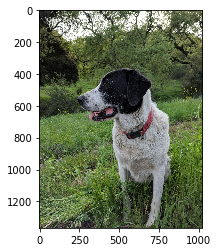

In [3]:
plt.imshow(full)

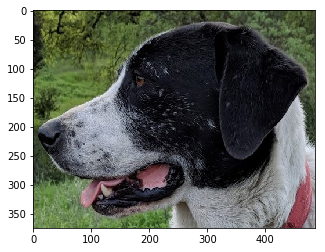

In [4]:
face = cv2.imread('sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [5]:
face.shape

(375, 486, 3)

In [6]:
full.shape

(1367, 1025, 3)

In [7]:
sum([1,2,3]) #This command is used to calculate the sum of a list

6

In [8]:
mystring = 'sum'

In [9]:
mystring([1,2,3]) #This doesnt make any sense, however, it can be used like sum function using eval

TypeError: 'str' object is not callable

In [10]:
eval(mystring) 

<function sum(iterable, start=0, /)>

In [13]:
myfunc =eval(mystring) #This command evaluates mystring to return an inbuilt function to an user defined function name i.e aka name for the function

In [12]:
myfunc([1,2,3])

6

In [14]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

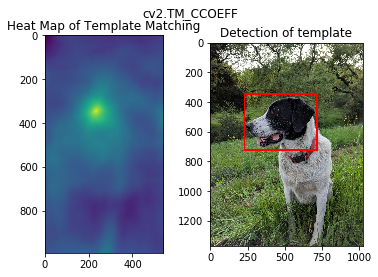

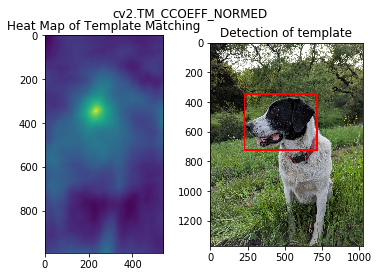

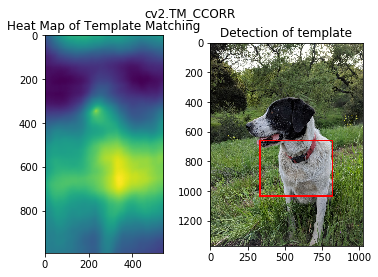

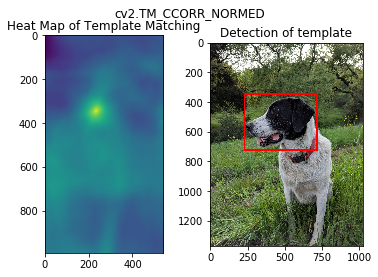

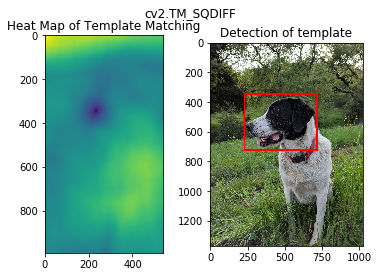

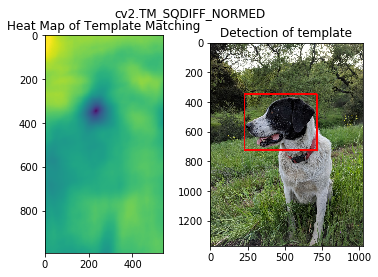

In [24]:
#Skip to the next two cells to understand what 'res' is
for m in methods:
    #Create a copy of the full image 
    full_copy = full.copy()
    method = eval(m)
    
    #Template matching
    res = cv2.matchTemplate(full_copy,face,method) #This command is used to perform template matching. 1st parameter indicates larger image
    #2nd parameter is the smaller image which needs to be found in the larger image. 
    #3rd parameter specifies the method of template matching that needs to be used
    min_val,max_val,min_loc,max_loc =cv2.minMaxLoc(res) #This command takes in the heat map in res and provides min val, max val and their positions
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]: #These are the two methods that produces minimum values for max correlation
        top_left = min_loc #top_left holds values in (x,y) format
        
    else:
        top_left = max_loc
    
    height, width, channels = face.shape #face.shape returns values in (y,x format)
    
    bottom_right = (top_left[0]+width,top_left[1]+height)
    
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    #Plot and show the images
    plt.subplot(121)
    plt.imshow(res)
    plt.title("Heat Map of Template Matching")
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detection of template')
    #Title with the method used
    plt.suptitle(m)
    
    plt.show()
    
    print('\n')
    print('\n')
    
    

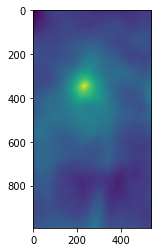

In [20]:
res = cv2.matchTemplate(full,face,cv2.TM_CCOEFF)
plt.imshow(res) #Res holds a bright spot for where it finds the max or min amount of correlation (depending upon method used)
#The bright spot corresponds to the top left corner of the image